In [1]:
#importing relevant libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('titanic_train.csv')
df_test = pd.read_csv('test_clean.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
#checking for missing values
df_test.isnull().sum()

Age              0
Cabin          327
Embarked         0
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Ticket           0
Title            0
Family_Size      0
dtype: int64

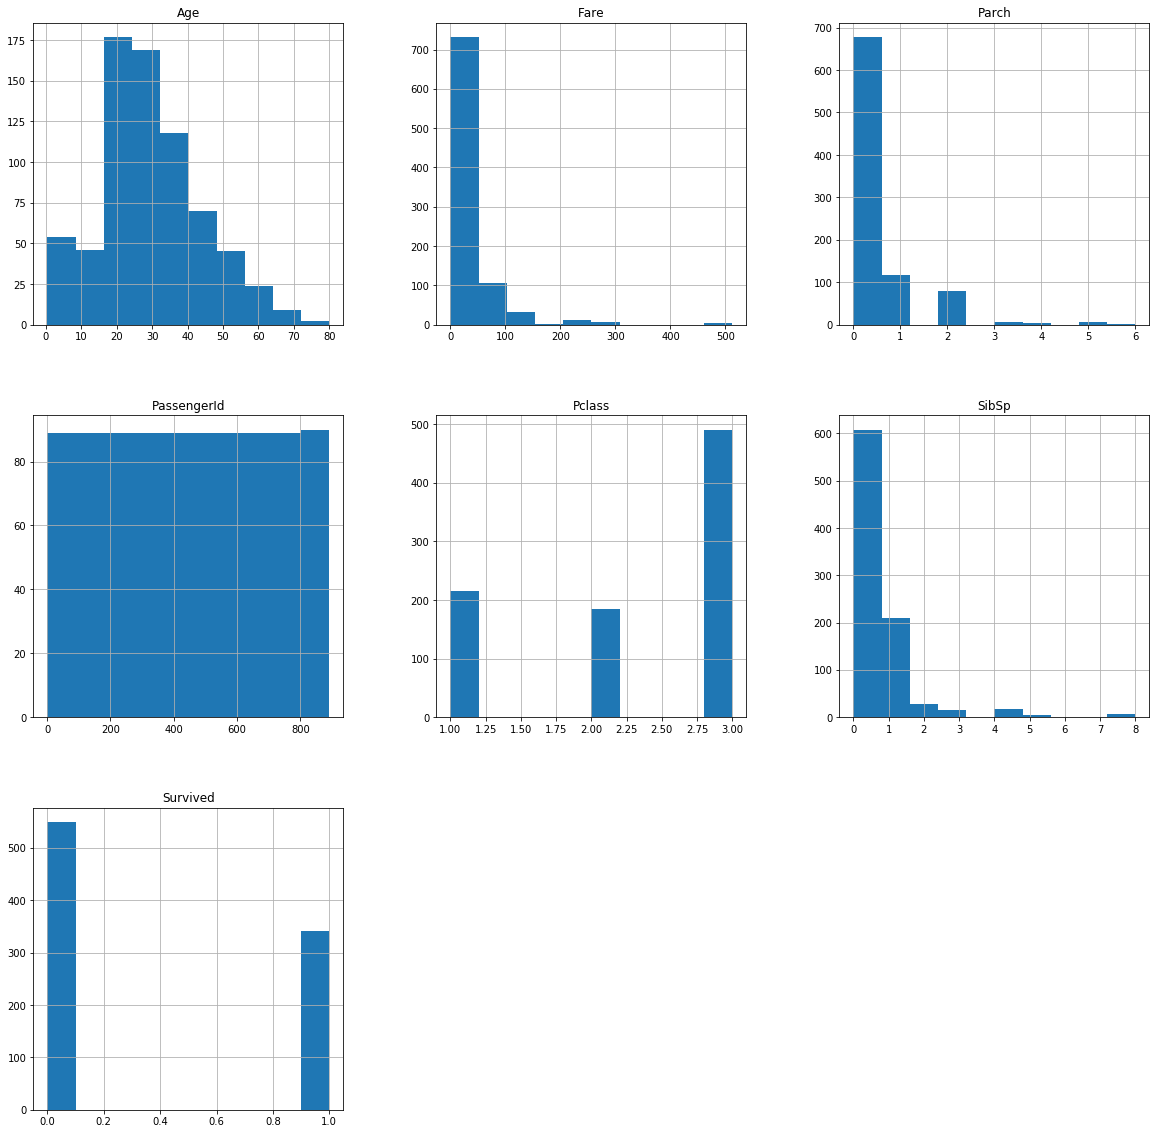

In [6]:
#plotting histogram for the whole dataset in order to take a indepth look at the missing values
hist = df_train.hist(figsize=(20,20))

In [7]:
#dropping features in test dataset that we might not need for the analysis
df_test.drop(['PassengerId', 'Survived', 'Name' ,'Ticket','Title', 'Cabin', 'Embarked'], axis = 1, inplace=True)

In [8]:
#checking for missing values
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
#copYing the original dataset and working with the copied one
train_data = df_train.copy()

In [10]:
test_data = df_test.copy()

In [11]:
#dropping train dataset features that we might not need

train_data.drop(['PassengerId', 'Name' ,'Ticket', 'Cabin', 'Embarked'], axis = 1, inplace=True)

In [12]:
#assigning 0 to male and 1 to female sex
def sex(Sex):
    if Sex == 'male':
        return 0
    if Sex == 'female':
        return 1


In [13]:
#creating a new column for sex 0 and 1 for train and test dataset
train_data['sex'] = train_data['Sex'].apply(sex)
test_data['sex'] = test_data['Sex'].apply(sex)


In [14]:
#dropping the sex column in both dataset
train_data = train_data.drop('Sex', axis =1)
test_data = test_data.drop('Sex', axis =1)

In [15]:
#filling the NaN values in the age column with the mean because the age ccolumn histogram is skewes to the right
age_mean = train_data['Age'].mean()
train_data['Age'] = train_data['Age'].replace(np.nan,age_mean)


In [16]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,sex
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.352413
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.477990
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


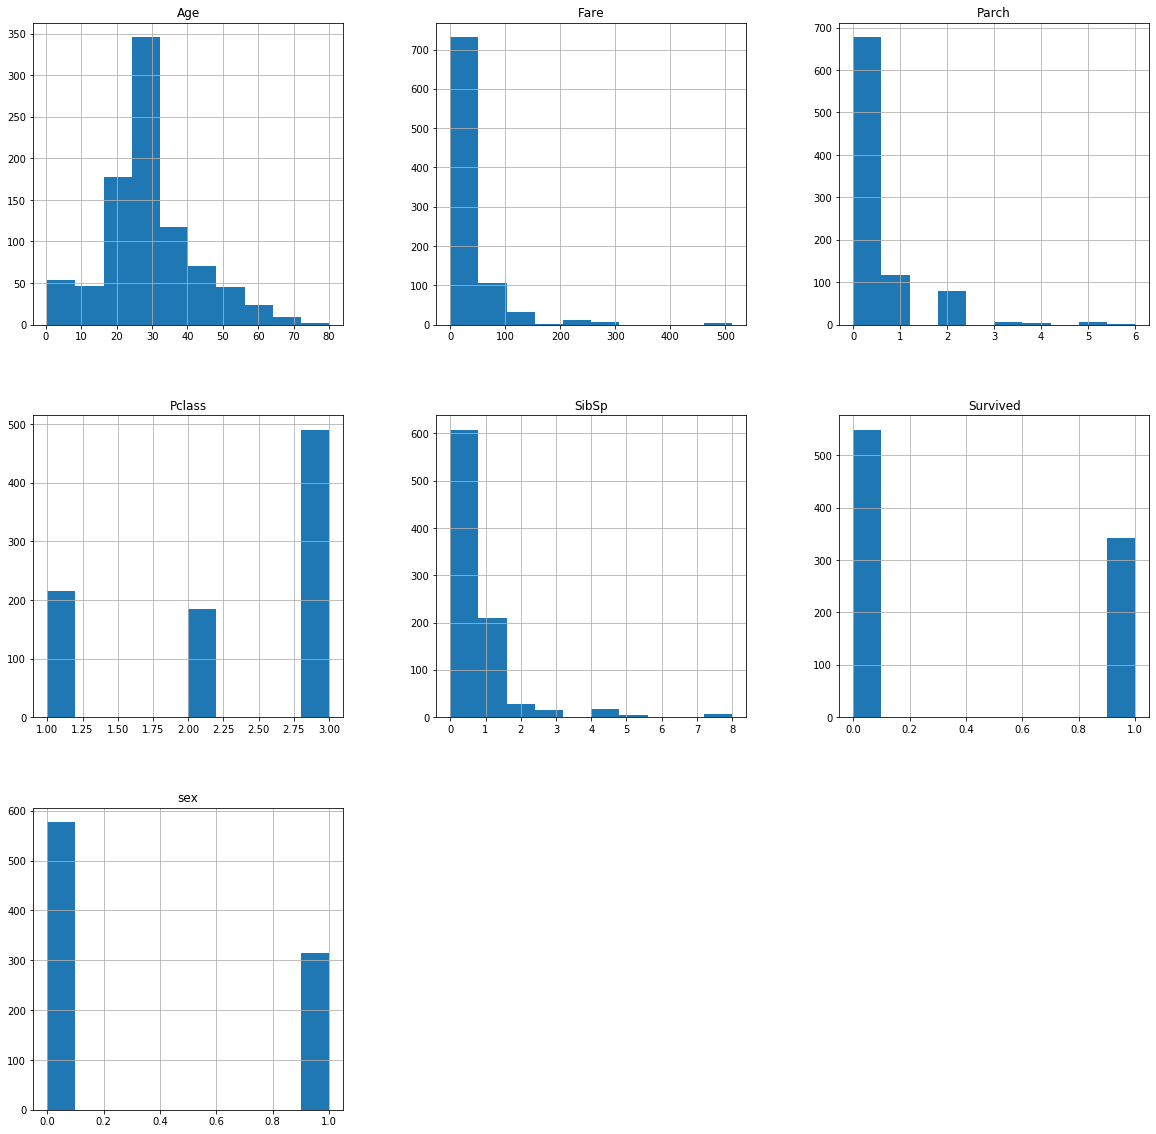

In [17]:
#checking the how the dataset looks like after filling the missing/NaN values
plot = train_data.hist(figsize =(20,20))


PLOTTING GRAPHS FOR THE DATASET

Text(0.5, 1.0, 'SibSP Distribution - Survived vs Non-Survived')

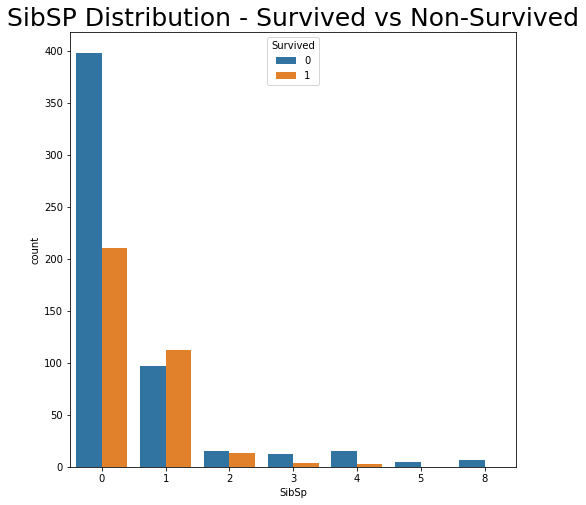

In [18]:
#plotting graph for passengers according to the number of family members they were with
plt.subplots(figsize = (8,8))
ax=sns.countplot(x='SibSp',hue='Survived',data=train_data)
plt.title("SibSP Distribution - Survived vs Non-Survived", fontsize = 25)


Text(0.5, 1.0, 'Sex Distribution - Survived vs Non-Survived')

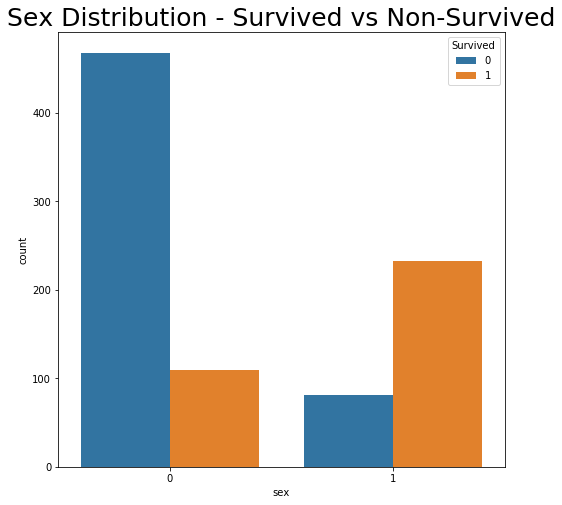

In [19]:
#plotting for Sex

plt.subplots(figsize = (8,8))
ax=sns.countplot(x='sex',hue='Survived',data=train_data)
plt.title("Sex Distribution - Survived vs Non-Survived", fontsize = 25)


In the plot above, more of the male sex did not survive while a higher number of female survived

Text(0.5, 1.0, 'Passenger Class Distribution - Survived vs Non-Survived')

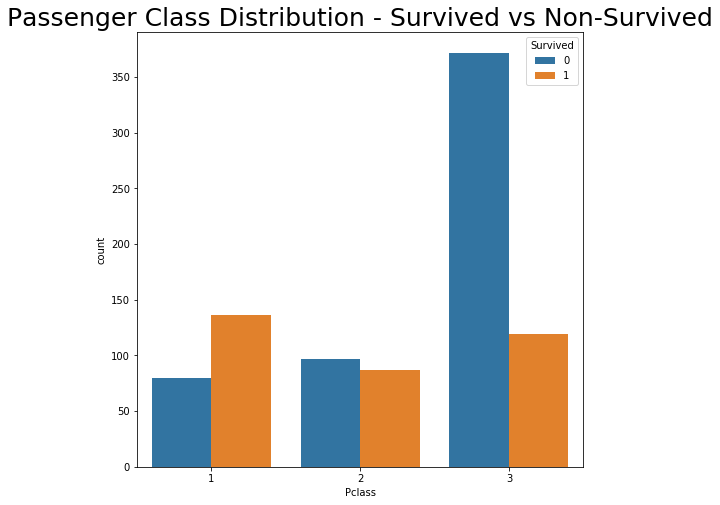

In [20]:
plt.subplots(figsize = (8,8))
ax=sns.countplot(x='Pclass',hue='Survived',data=train_data)
plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 25)


In the plot above, passengers in the third class had the highest number of people that didn't survive the accident while passengers in the first class had the hughest number of those that survived

<Figure size 2160x2160 with 0 Axes>

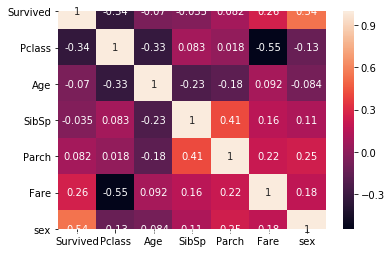

<Figure size 2160x2160 with 0 Axes>

In [21]:
%matplotlib inline
p = sns.heatmap(train_data.corr(),annot = True, Cmap ='Blues')
plt.figure(figsize=(30,30))

#to get the predicfor variable, after the heatmap, check the lines as regards to the prediction and also they are what you use for the model

In [22]:
#feature engineering. deriving the relative count from the SibSp and Parch Columns
train_data['Relative Count'] = train_data['SibSp'] + train_data['Parch'] 
test_data['Relative Count'] = test_data['SibSp'] + test_data['Parch'] 

In [23]:
train_data['Travel Alone'] = np.where(train_data['SibSp'] + train_data['Parch']>0, 'No','Yes')
test_data['Travel Alone'] = np.where(test_data['SibSp'] + test_data['Parch']>0, 'No','Yes')

In [24]:
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,sex,Relative Count,Travel Alone
0,0,3,22.0,1,0,7.2500,0,1,No
1,1,1,38.0,1,0,71.2833,1,1,No
2,1,3,26.0,0,0,7.9250,1,0,Yes
3,1,1,35.0,1,0,53.1000,1,1,No
4,0,3,35.0,0,0,8.0500,0,0,Yes


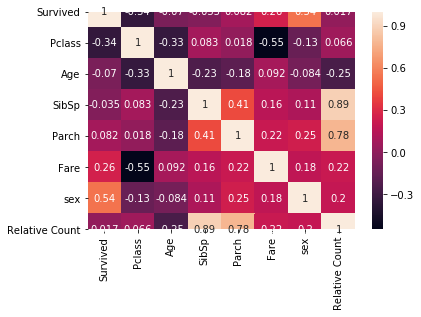

In [25]:
p = sns.heatmap(train_data.corr(), annot = True, Cmap ='Blues')

#histogram of the dataset with the new columns which are 'travel alohe' and 'relative count'

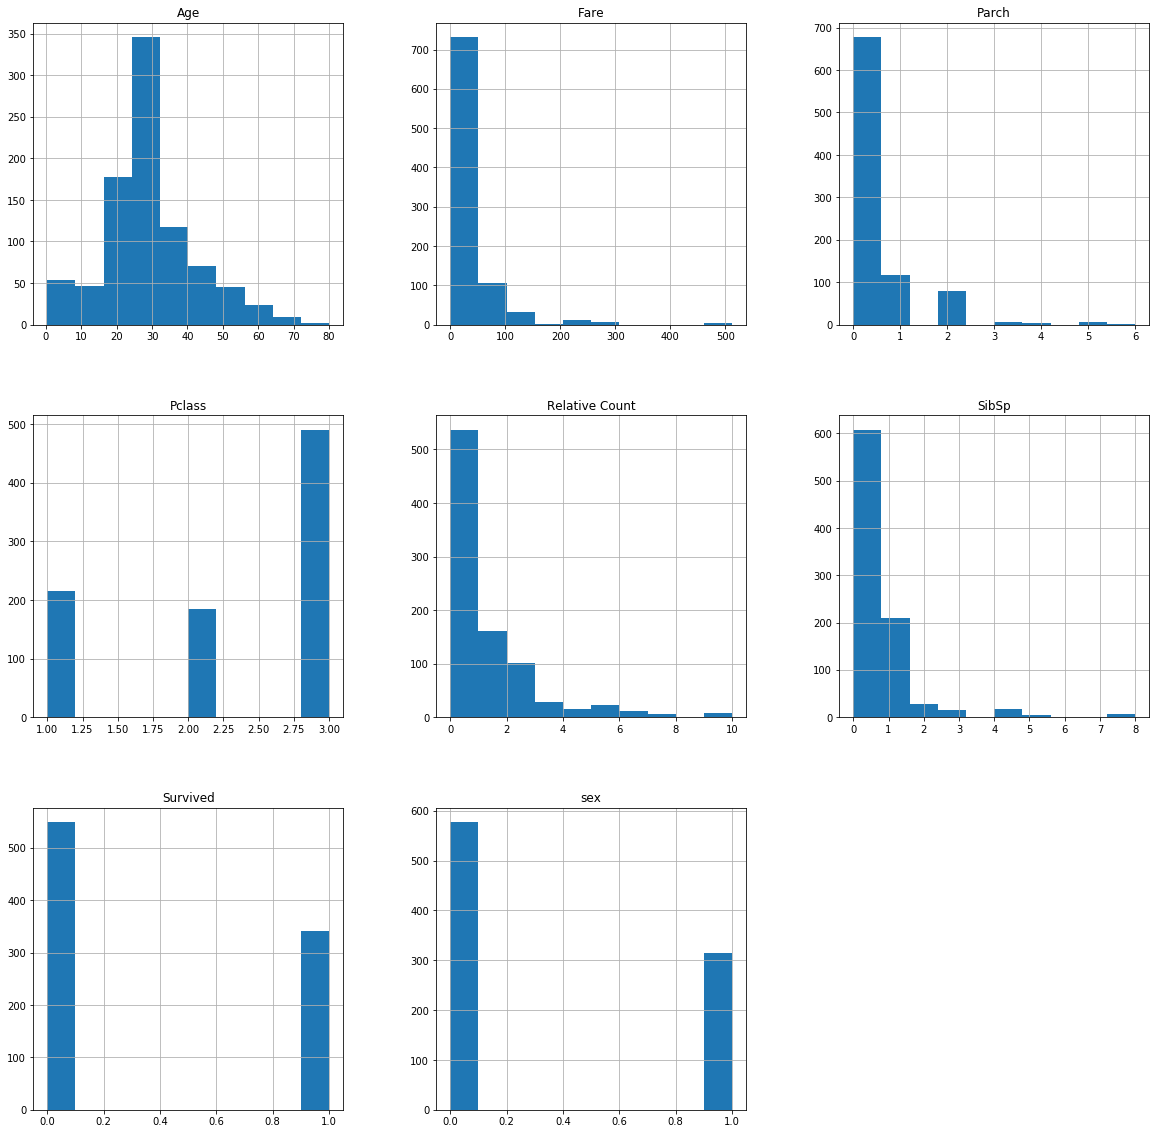

In [26]:

plot = train_data.hist(figsize =(20,20))

In [27]:
#changing the values of Travel Alone from yes/no to categorical numbers
def travel_alone(Travel_Alone):
    if Travel_Alone == 'Yes':
        return 1
    return 0

In [28]:
#inputing the categorical numbers created using Def into the dataset
train_data['Travel alone'] = train_data['Travel Alone'].apply(travel_alone)

test_data['Travel alone'] = test_data['Travel Alone'].apply(travel_alone)



In [29]:
#dropping features
train_data.drop('Travel Alone', axis = 1, inplace =True)
test_data.drop('Travel Alone', axis = 1, inplace =True)

In [30]:
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,sex,Relative Count,Travel alone
0,0,3,22.0,1,0,7.2500,0,1,0
1,1,1,38.0,1,0,71.2833,1,1,0
2,1,3,26.0,0,0,7.9250,1,0,1
3,1,1,35.0,1,0,53.1000,1,1,0
4,0,3,35.0,0,0,8.0500,0,0,1


In [31]:
test_data.head()

,Age,Fare,Parch,Pclass,SibSp,Family_Size,sex,Relative Count,Travel alone
0,34.5,7.8292,0,3,0,0,0,0,1
1,47.0,7.0000,0,3,1,1,1,1,0
2,62.0,9.6875,0,2,0,0,0,0,1
3,27.0,8.6625,0,3,0,0,0,0,1
4,22.0,12.2875,1,3,1,2,1,2,0


In [32]:
train_data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

SCALING USING STANDARD SCALER

In [33]:
X = train_data.drop('Survived', 1)
y = train_data['Survived']

In [34]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X = std_scaler.fit_transform(X)
#testframe = std_scaler.fit_transform(test_df)
#testframe.shape

MODEL BUILDING

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=2)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


In [37]:
#training the model
reg = LogisticRegression()


In [38]:
reg.fit(X_train,y_train)

C:\Users\user-pc\Pictures\new anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
predictions=reg.predict(X_test)


In [40]:
from sklearn.metrics import precision_score,recall_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(precision_score(y_test,predictions))
print(recall_score(y_test,predictions))

0.8139013452914798
[[238  32]
 [ 51 125]]
0.7961783439490446
0.7102272727272727


In [41]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       270
           1       0.80      0.71      0.75       176

    accuracy                           0.81       446
   macro avg       0.81      0.80      0.80       446
weighted avg       0.81      0.81      0.81       446

